In [1]:
import os
import sys
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import pickle



In [36]:
def read_csv_from_zip(zip_path, file_name):
    """
    Reads a CSV file directly from a ZIP archive without extracting.

    Args:
        zip_path (str): Path to the ZIP archive.
        file_name (str): Name of the CSV file inside the ZIP.

    Returns:
        pd.DataFrame: The loaded dataframe.
    """
    try:
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            # Check if the file exists inside the ZIP
            if file_name not in zip_ref.namelist():
                print(f"Error: '{file_name}' not found in the ZIP archive.")
                return None

            # Read CSV directly from ZIP
            with zip_ref.open(file_name) as file:
                df = pd.read_csv(file)
                return df

    except FileNotFoundError:
        print(f"Error: Zip file '{zip_path}' not found.")
    except zipfile.BadZipFile:
        print(f"Error: '{zip_path}' is not a valid zip file.")
    except Exception as e:
        print(f"An error occurred: {e}")
    
    return None


# Define paths
zip_file_path = 'C:/Users/Niranjan kumar/Desktop/SPRING 2025/Predictive Maintenance/Capstone/Dataset/alarms_log_data.zip'  # Path to the ZIP file
csv_file_name = 'alarms_log_data/raw/alarms.csv'  # Name of the CSV inside the ZIP

# Read CSV file directly from ZIP
df = read_csv_from_zip(zip_file_path, csv_file_name)

# Display the first few rows if loaded successfully
if df is not None:
    print(df.head())


                 timestamp  alarm  serial
0  2019-02-21 19:57:57.532    139       4
1  2019-02-21 19:58:28.293    139       4
2  2019-02-21 19:58:32.853    139       4
3  2019-02-21 19:59:05.387    139       4
4  2019-02-21 20:02:05.832    139       4


In [37]:
df

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4
...,...,...,...
444829,2020-06-15 22:53:05.303,139,19
444830,2020-06-15 22:56:19.633,139,19
444831,2020-06-15 23:03:16.854,139,19
444832,2020-06-15 23:03:50.454,139,19


In [38]:
# Check for missing values and handle them if necessary
print(df.isnull().sum())

timestamp    0
alarm        0
serial       0
dtype: int64


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 444834 entries, 0 to 444833
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   timestamp  444834 non-null  object
 1   alarm      444834 non-null  int64 
 2   serial     444834 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 10.2+ MB


In [40]:
df['alarm'].value_counts()

alarm
98     90762
11     60994
26     57320
137    57273
139    48551
       ...  
147        1
62         1
125        1
81         1
59         1
Name: count, Length: 154, dtype: int64

In [41]:
df['serial'].value_counts()

serial
6     59357
7     50683
10    49670
3     42387
13    37022
0     36129
12    26068
14    24399
9     22178
5     18646
2     17399
1     14509
8     10972
15     9620
17     8872
11     8202
16     3569
18     2813
4      2118
19      221
Name: count, dtype: int64

In [42]:
df

,timestamp,alarm,serial
0,2019-02-21 19:57:57.532,139,4
1,2019-02-21 19:58:28.293,139,4
2,2019-02-21 19:58:32.853,139,4
3,2019-02-21 19:59:05.387,139,4
4,2019-02-21 20:02:05.832,139,4
...,...,...,...
444829,2020-06-15 22:53:05.303,139,19
444830,2020-06-15 22:56:19.633,139,19
444831,2020-06-15 23:03:16.854,139,19
444832,2020-06-15 23:03:50.454,139,19


In [43]:
# Assuming 'df' is your DataFrame
df['timestamp'] = pd.to_datetime(df['timestamp'])


In [44]:
df = df.sort_values(by='timestamp')
df['timestamp'] = df['timestamp'].dt.floor('S')  # Round down to the nearest second
df.head()

C:\Users\Niranjan kumar\AppData\Local\Temp\ipykernel_18476\3676491796.py:2: FutureWarning: 'S' is deprecated and will be removed in a future version, please use 's' instead.
  df['timestamp'] = df['timestamp'].dt.floor('S')  # Round down to the nearest second


,timestamp,alarm,serial
39140,2019-02-21 10:16:18,139,3
39141,2019-02-21 10:16:59,139,3
39142,2019-02-21 10:18:41,139,3
39143,2019-02-21 10:19:24,139,3
39144,2019-02-21 10:20:06,139,3


In [45]:
df = df.reset_index(drop=True)
df.head()

,timestamp,alarm,serial
0,2019-02-21 10:16:18,139,3
1,2019-02-21 10:16:59,139,3
2,2019-02-21 10:18:41,139,3
3,2019-02-21 10:19:24,139,3
4,2019-02-21 10:20:06,139,3


In [46]:
# Set the timestamp as the index
df.set_index('timestamp', inplace=True)
df

,alarm,serial
timestamp,,
2019-02-21 10:16:18,139,3
2019-02-21 10:16:59,139,3
2019-02-21 10:18:41,139,3
2019-02-21 10:19:24,139,3
2019-02-21 10:20:06,139,3
...,...,...
2020-06-17 03:17:18,138,0
2020-06-17 03:28:51,138,0
2020-06-17 03:28:59,138,0


# Feature Engineering

In [ ]:
# # Extract date-based features
# df['hour'] = df['timestamp'].dt.hour
# df['minute'] = df['timestamp'].dt.minute
# df['second'] = df['timestamp'].dt.second
# df['day_of_week'] = df['timestamp'].dt.day_name()
# df['day_of_year'] = df['timestamp'].dt.dayofyear
# df['week_of_year'] = df['timestamp'].dt.isocalendar().week
# df['month'] = df['timestamp'].dt.month
# df['year'] = df['timestamp'].dt.year
# df['quarter'] = df['timestamp'].dt.quarter

In [47]:
# Add new time-related features
df['hour'] = df.index.hour
df['minute'] = df.index.minute
df['second'] = df.index.second
df['day_of_year'] = df.index.dayofyear
df['day_of_week'] = df.index.dayofweek
df['month'] = df.index.month
df['day_of_month'] = df.index.day
df['week_of_year'] = df.index.isocalendar().week
df['year'] = df.index.year
df['quarter'] = df.index.quarter


In [48]:
df.head()

,alarm,serial,hour,minute,second,day_of_year,day_of_week,month,day_of_month,week_of_year,year,quarter
timestamp,,,,,,,,,,,,
2019-02-21 10:16:18,139,3,10,16,18,52,3,2,21,8,2019,1
2019-02-21 10:16:59,139,3,10,16,59,52,3,2,21,8,2019,1
2019-02-21 10:18:41,139,3,10,18,41,52,3,2,21,8,2019,1
2019-02-21 10:19:24,139,3,10,19,24,52,3,2,21,8,2019,1
2019-02-21 10:20:06,139,3,10,20,6,52,3,2,21,8,2019,1


In [49]:
# Encode weekend & weekday
df['is_weekend'] = df['day_of_week'].isin(['Saturday', 'Sunday']).astype(int)
df['is_weekday'] = df['day_of_week'].isin(['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday']).astype(int)

# Time-of-day encoding
df['is_morning'] = df['hour'].between(5, 11).astype(int)
df['is_afternoon'] = df['hour'].between(12, 17).astype(int)
df['is_evening'] = df['hour'].between(18, 21).astype(int)
df['is_night'] = ((df['hour'] >= 22) | (df['hour'] <= 4)).astype(int)

In [50]:
df.head()

,alarm,serial,hour,minute,second,day_of_year,day_of_week,month,day_of_month,week_of_year,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
timestamp,,,,,,,,,,,,,,,,,,
2019-02-21 10:16:18,139,3,10,16,18,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:16:59,139,3,10,16,59,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:18:41,139,3,10,18,41,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:19:24,139,3,10,19,24,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:20:06,139,3,10,20,6,52,3,2,21,8,2019,1,0,0,1,0,0,0


In [51]:
df.describe()

,alarm,serial,hour,minute,second,day_of_year,day_of_week,month,day_of_month,week_of_year,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
count,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.000000,444834.0,444834.000000,444834.000000,444834.0,444834.0,444834.000000,444834.000000,444834.000000,444834.000000
mean,69.071004,7.657108,11.186123,29.609594,29.511759,166.877984,2.775802,5.998109,15.524079,24.330283,2019.372577,2.320385,0.0,0.0,0.348789,0.305255,0.128331,0.217625
std,49.876903,4.594188,6.108514,17.302363,17.307179,99.449007,1.948896,3.274238,8.749152,14.139765,0.483491,1.077358,0.0,0.0,0.476587,0.460516,0.334458,0.412631
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.0,2019.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
25%,26.000000,4.000000,6.000000,15.000000,15.000000,86.000000,1.000000,3.000000,8.000000,13.0,2019.000000,1.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
50%,45.000000,7.000000,11.000000,30.000000,30.000000,147.000000,3.000000,5.000000,16.000000,22.0,2019.000000,2.000000,0.0,0.0,0.000000,0.000000,0.000000,0.000000
75%,119.000000,12.000000,16.000000,45.000000,45.000000,254.000000,4.000000,9.000000,23.000000,37.0,2020.000000,3.000000,0.0,0.0,1.000000,1.000000,0.000000,0.000000
max,153.000000,19.000000,23.000000,59.000000,59.000000,365.000000,6.000000,12.000000,31.000000,52.0,2020.000000,4.000000,0.0,0.0,1.000000,1.000000,1.000000,1.000000


In [52]:
df

,alarm,serial,hour,minute,second,day_of_year,day_of_week,month,day_of_month,week_of_year,year,quarter,is_weekend,is_weekday,is_morning,is_afternoon,is_evening,is_night
timestamp,,,,,,,,,,,,,,,,,,
2019-02-21 10:16:18,139,3,10,16,18,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:16:59,139,3,10,16,59,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:18:41,139,3,10,18,41,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:19:24,139,3,10,19,24,52,3,2,21,8,2019,1,0,0,1,0,0,0
2019-02-21 10:20:06,139,3,10,20,6,52,3,2,21,8,2019,1,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-06-17 03:17:18,138,0,3,17,18,169,2,6,17,25,2020,2,0,0,0,0,0,1
2020-06-17 03:28:51,138,0,3,28,51,169,2,6,17,25,2020,2,0,0,0,0,0,1
2020-06-17 03:28:59,138,0,3,28,59,169,2,6,17,25,2020,2,0,0,0,0,0,1


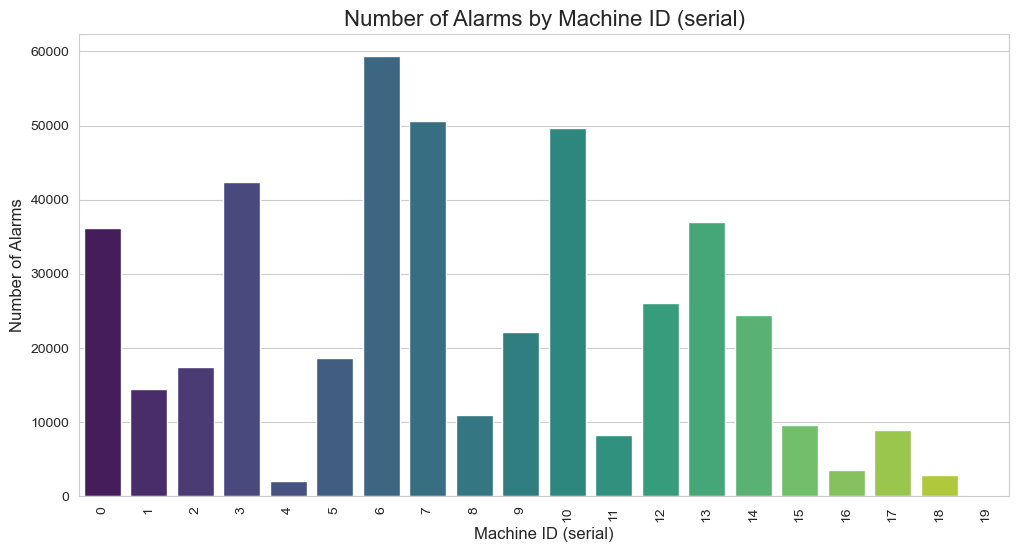

In [63]:
# Set plot style
sns.set_style("whitegrid")

df_machine_alarms = df.groupby('serial')['alarm'].count()

# Plotting the machine ID vs number of alarms
plt.figure(figsize=(12, 6))
sns.barplot(x=df_machine_alarms.index, y=df_machine_alarms.values, palette='viridis')
plt.title('Number of Alarms by Machine ID (serial)', fontsize=16)
plt.xlabel('Machine ID (serial)', fontsize=12)
plt.ylabel('Number of Alarms', fontsize=12)
plt.xticks(rotation=90)
plt.show()


c:\Users\Niranjan kumar\anaconda3\Lib\site-packages\seaborn\matrix.py:260: FutureWarning: Format strings passed to MaskedConstant are ignored, but in future may error or produce different behavior
  annotation = ("{:" + self.fmt + "}").format(val)


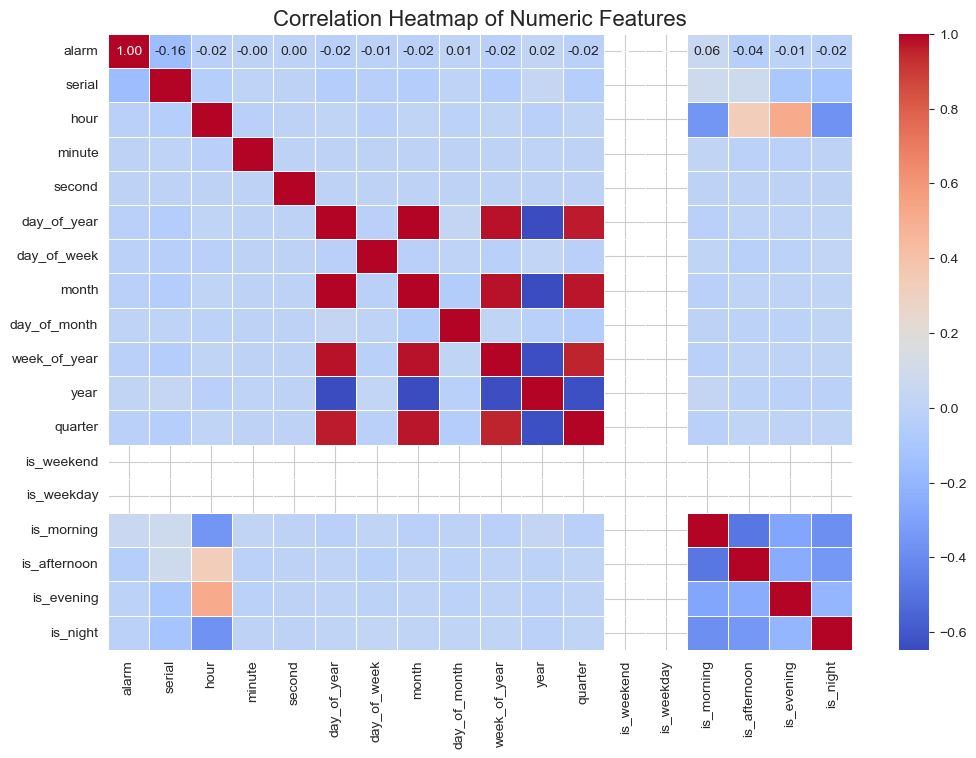

In [65]:
correlation_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)
plt.title('Correlation Heatmap of Numeric Features', fontsize=16)
plt.show()


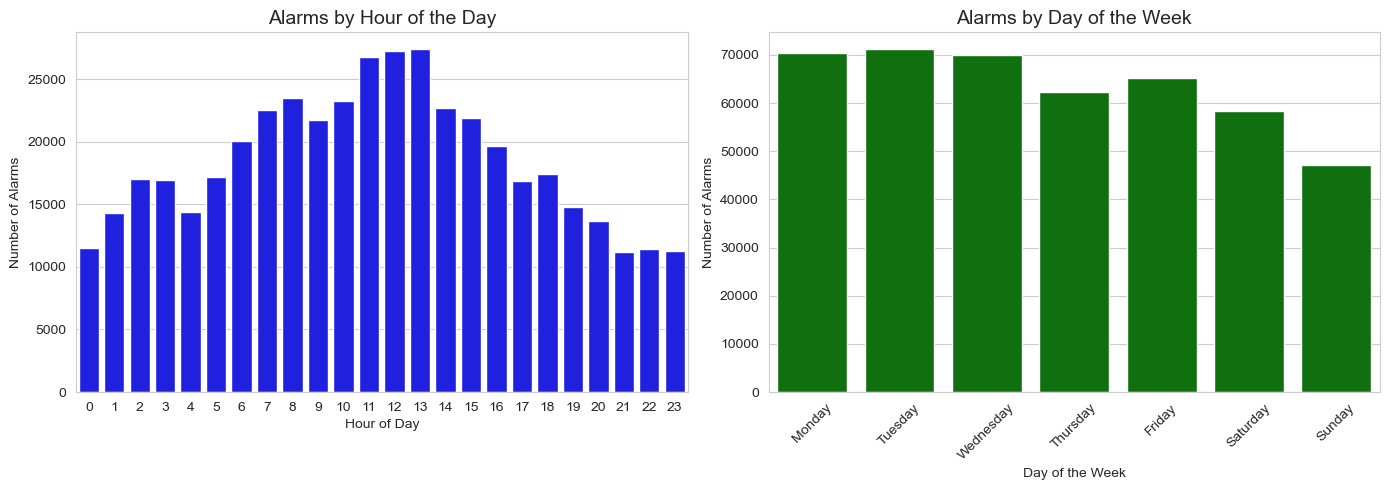

In [32]:
# Aggregate alarms by hour
df_hourly = df.groupby("hour").size()

# Aggregate alarms by day of the week
df_weekly = df.groupby("day_of_week").size()

# Sort days of the week in order
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]

# Plot hourly and weekly trends
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Hourly trend
sns.barplot(x=df_hourly.index, y=df_hourly.values, ax=axes[0], color="blue")
axes[0].set_title("Alarms by Hour of the Day", fontsize=14)
axes[0].set_xlabel("Hour of Day")
axes[0].set_ylabel("Number of Alarms")

# Weekly trend
sns.barplot(x=df_weekly.index, y=df_weekly.values, ax=axes[1], color="green", order=day_order)
axes[1].set_title("Alarms by Day of the Week", fontsize=14)
axes[1].set_xlabel("Day of the Week")
axes[1].set_ylabel("Number of Alarms")
axes[1].tick_params(axis="x", rotation=45)

plt.tight_layout()
plt.show()

C:\Users\Niranjan kumar\AppData\Local\Temp\ipykernel_18476\2726098978.py:3: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df['alarm'].resample('1M').count().plot(figsize=(12, 6), title='Monthly Alarm Counts')


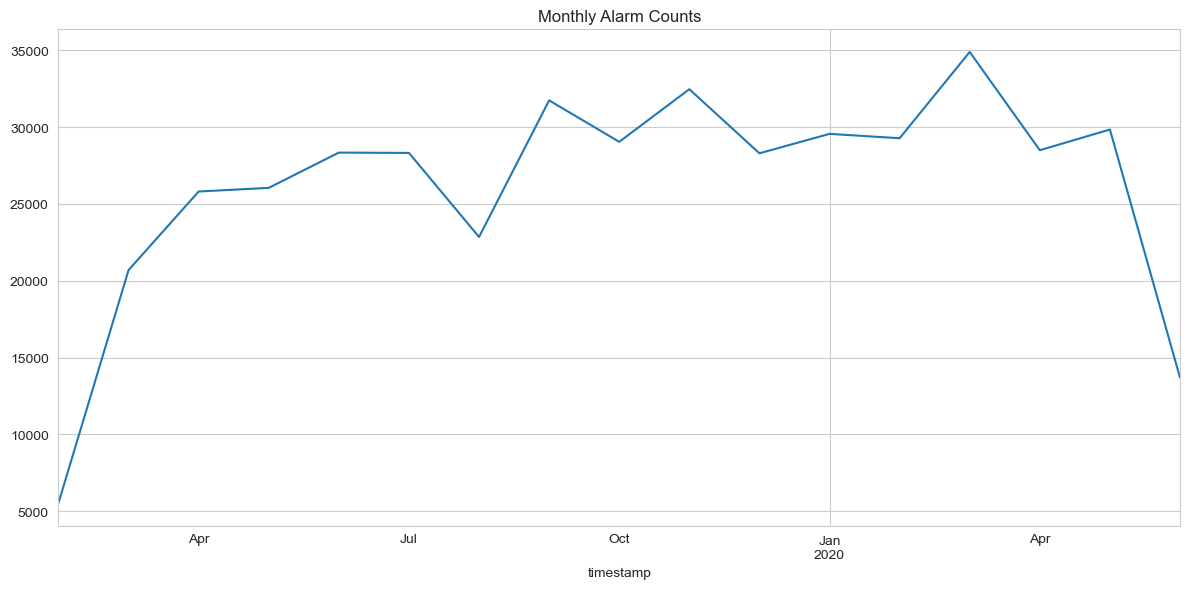

In [ ]:
# Plot Monthly Alarm Counts
# df['alarm'] = 1  # Assuming an 'alarm' column or create a constant column to count alarms
df['alarm'].resample('1M').count().plot(figsize=(12, 6), title='Monthly Alarm Counts')


# Show all plots
plt.tight_layout()
plt.show()



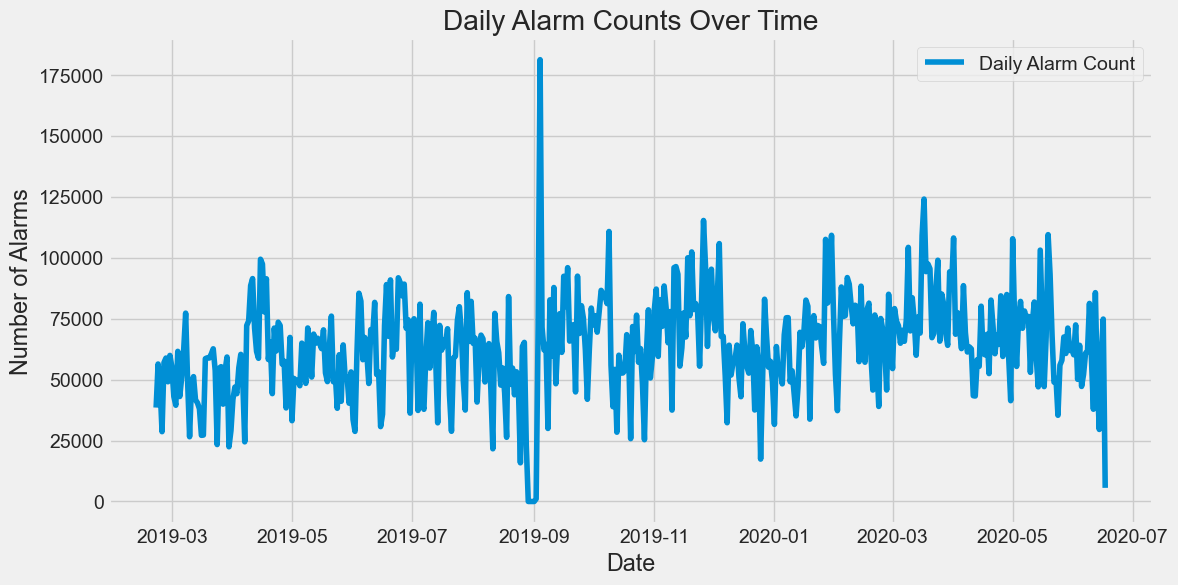

In [115]:
# Aggregate alarms by day or hour
df_aggregated = df['alarm'].resample('D').sum()  # Resampling by day (or you can use 'H' for hourly)

# Plot the aggregated time series
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated, label='Daily Alarm Count')
plt.title('Daily Alarm Counts Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.legend(loc='best')
plt.show()

# Check for Stationary

In [116]:
from statsmodels.tsa.stattools import adfuller

# Perform the ADF test
adf_test = adfuller(df_aggregated)
print(f"ADF Statistic: {adf_test[0]}")
print(f"p-value: {adf_test[1]}")

# If p-value > 0.05, data is non-stationary, and differencing may be required


ADF Statistic: -4.104129727561805
p-value: 0.0009534129248428492


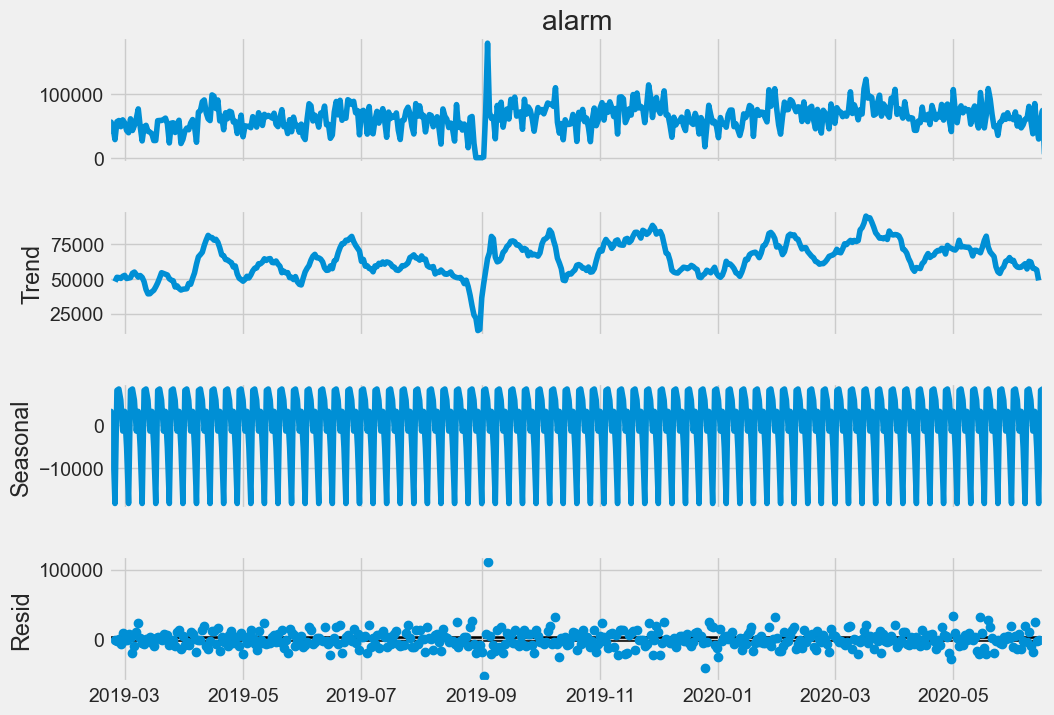

In [117]:
# decompose data into trend, seasonal, and residual

import statsmodels.api as sm
# Decompose the time series

plt.style.use('fivethirtyeight')
decomposition = sm.tsa.seasonal_decompose(df_aggregated, model='additive')
# Plot the decomposed components
fig = decomposition.plot()
fig.set_size_inches(12, 8)
plt.show()

In [118]:
# build model
model_1 = sm.tsa.statespace.SARIMAX(df_aggregated, order=(1, 1, 1),
                                seasonal_order=(1, 1, 1, 12),
                                enforce_stationarity=False,
                                enforce_invertibility=False).fit()
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                              alarm   No. Observations:                  483
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood               -5208.339
Date:                            Tue, 04 Mar 2025   AIC                          10426.678
Time:                                    17:27:26   BIC                          10447.290
Sample:                                02-21-2019   HQIC                         10434.797
                                     - 06-17-2020                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.1958      0.096      2.042      0.041       0.008       0.384
ma.L1         -0.8287      0.071    -11.628      0.000      -0.968      -0.689
ar.S.L12      -0.0895      0.115     -0.781      0.435      -0.314       0.135
ma.S.L12      -0.9068      0.058    -15.567      0.000      -1.021      -0.793
sigma2      8.562e+08   8.93e-11   9.59e+18      0.000    8.56e+08    8.56e+08
===================================================================================
Ljung-Box (L1) (Q):                   0.12   Jarque-Bera (JB):               862.85
Prob(Q):                              0.73   Prob(JB):                         0.00
Heteroskedasticity (H):               0.98   Skew:                             0.95
Prob(H) (two-sided):                  0.91   Kurtosis:                         9.47
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 1.95e+34. Standard errors may be unstable.
"""

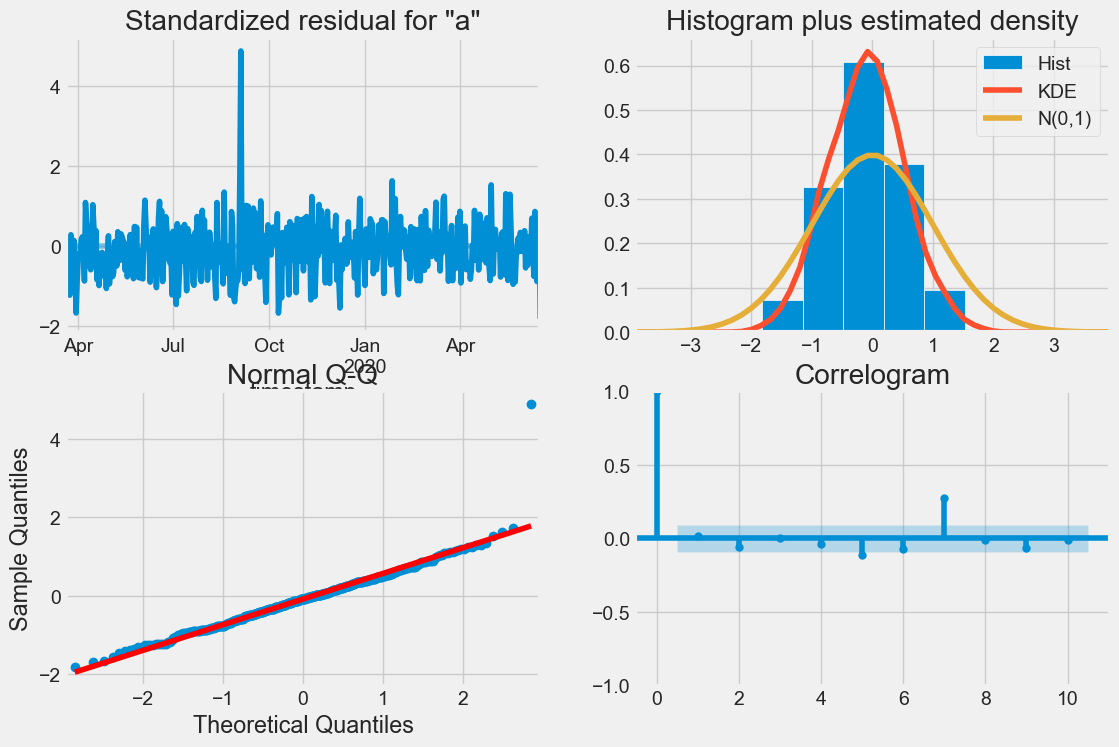

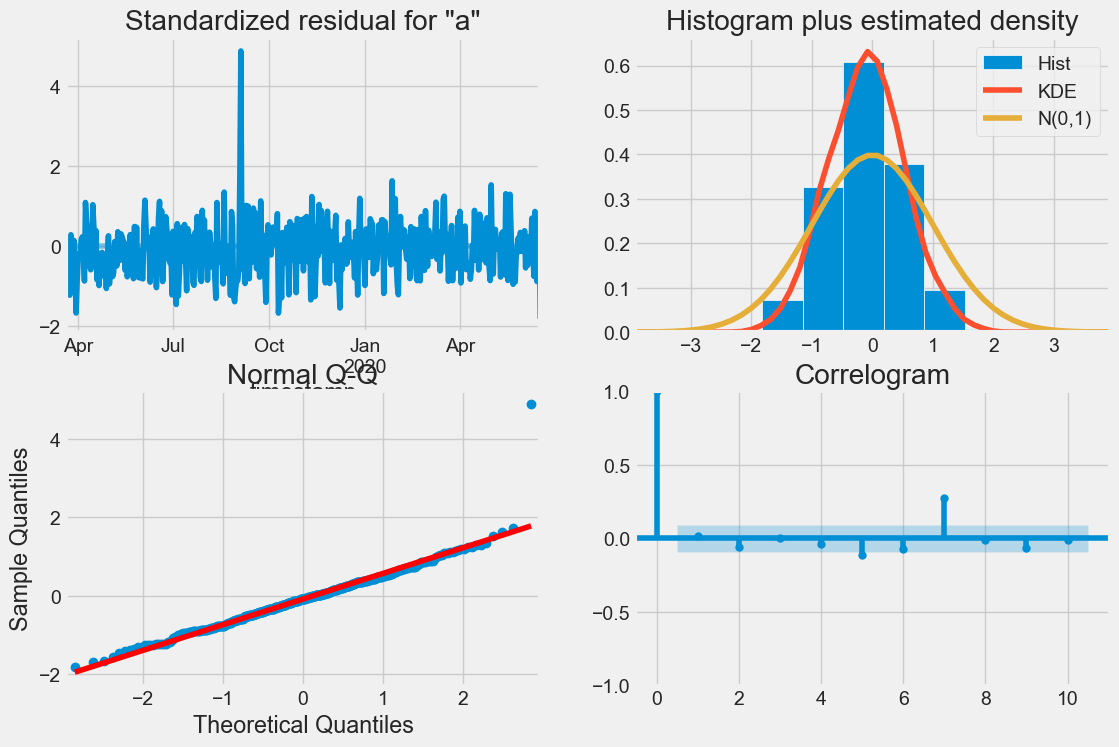

In [119]:

model_1.plot_diagnostics( figsize=(12, 8))


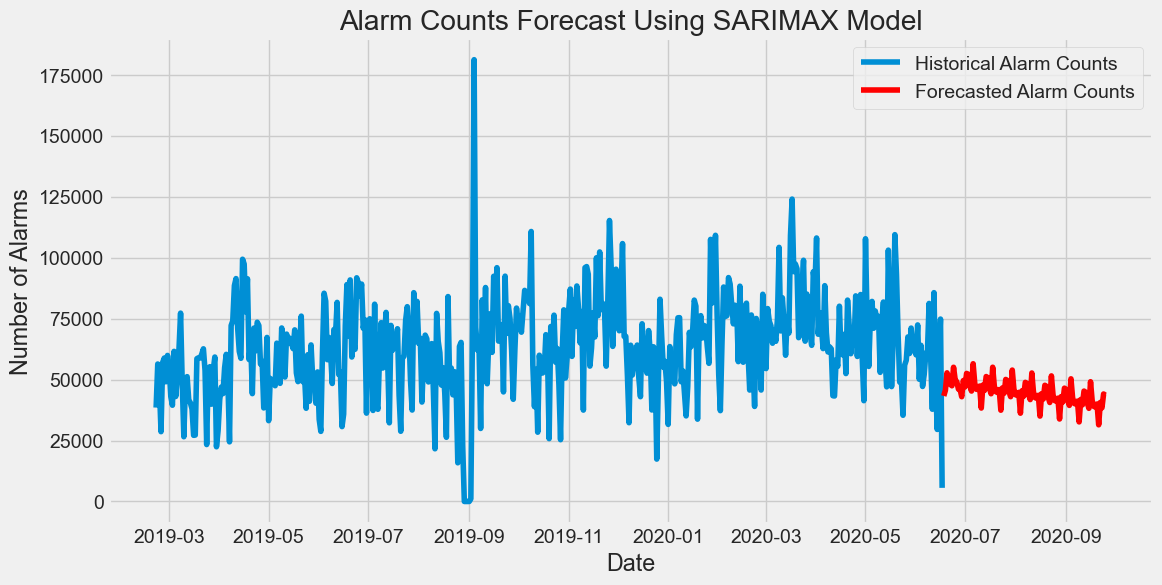

In [120]:
# Forecast for the next 30 days (change n_periods to the desired number of periods)
forecast = model_1.get_forecast(steps=100)

# Get the predicted values
forecast_values = forecast.predicted_mean

# Create a range of future dates
forecast_index = pd.date_range(df_aggregated.index[-1], periods = 101, freq='D')[1:]

# Create a forecasted series for plotting
forecast_series = pd.Series(forecast_values, index=forecast_index)

# Plot the forecasted values
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated, label='Historical Alarm Counts')
plt.plot(forecast_series, label='Forecasted Alarm Counts', color='red')
plt.title('Alarm Counts Forecast Using SARIMAX Model')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.legend(loc='best')
plt.show()


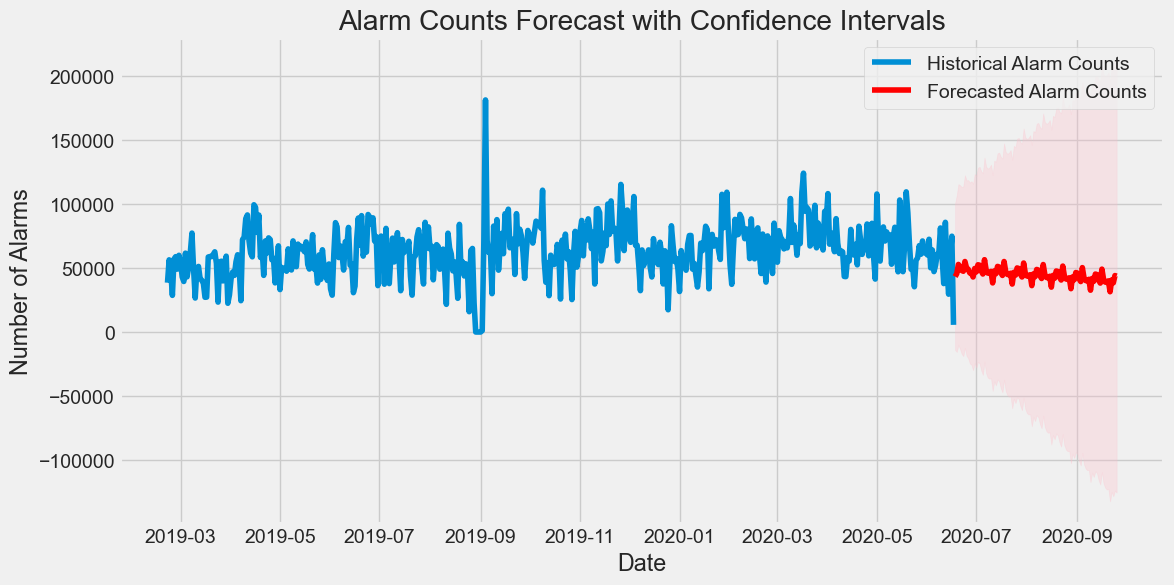

In [121]:
# Get the forecast with confidence intervals
forecast_ci = forecast.conf_int()

# Plot the forecast with confidence intervals
plt.figure(figsize=(12, 6))
plt.plot(df_aggregated, label='Historical Alarm Counts')
plt.plot(forecast_series, label='Forecasted Alarm Counts', color='red')
plt.fill_between(forecast_index, forecast_ci.iloc[:, 0], forecast_ci.iloc[:, 1], color='pink', alpha=0.3)
plt.title('Alarm Counts Forecast with Confidence Intervals')
plt.xlabel('Date')
plt.ylabel('Number of Alarms')
plt.legend(loc='best')
plt.show()


In [96]:
from sklearn.metrics import mean_squared_error

# Get the in-sample predictions (for the period that the model was trained on)
in_sample_predictions = model_1.predict(start=df_aggregated.index[0], end=df_aggregated.index[-1])

# Compute Mean Squared Error (MSE) between actual values and predicted values
mse = mean_squared_error(df_aggregated, in_sample_predictions)

print(f"Mean Squared Error (MSE) for the in-sample data: {mse}")


Mean Squared Error (MSE) for the in-sample data: 370847918.26080346


In [125]:
df_aggregated

timestamp
2019-02-21    38497
2019-02-22    56363
2019-02-23    47328
2019-02-24    28626
2019-02-25    56956
              ...  
2020-06-13    48419
2020-06-14    29536
2020-06-15    59510
2020-06-16    74789
2020-06-17     5593
Freq: D, Name: alarm, Length: 483, dtype: int64

# Prophet

In [124]:
from fbprophet import Prophet

ModuleNotFoundError: No module named 'fbprophet'

In [126]:
import pickle

with open("C:/Users/Niranjan kumar/Desktop/SPRING 2025/Predictive Maintenance/Capstone/EDA And Preprocessing/alarm_sequences_for_models.pkl", "rb") as f:
    results = pickle.load(f)

In [130]:
forecasting_data = results['forecasting']

In [132]:
machine3_forecasting = forecasting_data[3]  # List of (input_sequence, target_sequence) tuples
machine3_forecasting

[([139, 97, 139, 97, 139, 127, 139, 138, 97], [139]),
 ([97, 139, 97, 139, 127, 139, 138, 97, 139], [97]),
 ([139, 97, 139, 127, 139, 138, 97, 139, 97], [139]),
 ([97, 139, 127, 139, 138, 97, 139, 97, 139], [97]),
 ([139, 127, 139, 138, 97, 139, 97, 139, 97], [139]),
 ([127, 139, 138, 97, 139, 97, 139, 97, 139], [11]),
 ([139, 138, 97, 139, 97, 139, 97, 139, 11], [139]),
 ([138, 97, 139, 97, 139, 97, 139, 11, 139], [11]),
 ([97, 139, 97, 139, 97, 139, 11, 139, 11], [97]),
 ([139, 97, 139, 97, 139, 11, 139, 11, 97], [139]),
 ([97, 139, 97, 139, 11, 139, 11, 97, 139], [97]),
 ([139, 97, 139, 11, 139, 11, 97, 139, 97], [139]),
 ([97, 139, 11, 139, 11, 97, 139, 97, 139], [31]),
 ([139, 11, 139, 11, 97, 139, 97, 139, 31], [97]),
 ([11, 139, 11, 97, 139, 97, 139, 31, 97], [11]),
 ([139, 11, 97, 139, 97, 139, 31, 97, 11], [139]),
 ([11, 97, 139, 97, 139, 31, 97, 11, 139], [97]),
 ([97, 139, 97, 139, 31, 97, 11, 139, 97], [11]),
 ([139, 97, 139, 31, 97, 11, 139, 97, 11], [97]),
 ([97, 139, 31,

In [133]:
# Example: Extracting the input and target sequences for machine '3'
input_sequences = [item[0] for item in machine3_forecasting]
target_sequences = [item[1] for item in machine3_forecasting]


In [135]:
# Check the data types of input and target sequences
print(type(input_sequences), type(input_sequences[0]))  # Check the type of the first element
print(type(target_sequences), type(target_sequences[0]))  # Check the type of the first element


<class 'list'> <class 'list'>
<class 'list'> <class 'list'>


In [139]:
# Convert input and target sequences to numpy arrays of type float
input_data = np.array(input_sequences, dtype=np.float64)
target_data = np.array(target_sequences, dtype=np.float64).ravel()

# Convert them to pandas DataFrame/Series
input_data = pd.DataFrame(input_data)
target_data = pd.Series(target_data)

# Check for NaN or infinite values in both input_data and target_data
if np.any(np.isnan(input_data)) or np.any(np.isnan(target_data)):
    print("Warning: NaN values found in the data.")

if np.any(np.isinf(input_data)) or np.any(np.isinf(target_data)):
    print("Warning: Infinite values found in the data.")



In [140]:


# Train a SARIMAX model on the input and target sequences
model = sm.tsa.statespace.SARIMAX(target_data, exog=input_data,
                                  order=(1, 1, 1),
                                  seasonal_order=(1, 1, 1, 12),
                                  enforce_stationarity=False,
                                  enforce_invertibility=False).fit()

print(model.summary())

c:\Users\Niranjan kumar\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                                     SARIMAX Results                                      
Dep. Variable:                                  y   No. Observations:                 8693
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood              -46101.378
Date:                            Tue, 04 Mar 2025   AIC                          92230.755
Time:                                    18:01:19   BIC                          92329.696
Sample:                                         0   HQIC                         92264.486
                                           - 8693                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
0              0.0148      0.020      0.740      0.459      -0.024       0.054
1              0.0153      0.013   

In [150]:
# Assume the last known value of the input_data is used for future predictions
# You could use a different strategy based on your data (e.g., linear extrapolation)
future_input_data = np.tile(input_data.iloc[-1], (10, 1))  # Repeating the last value for the next 10 steps

# Get the forecast for the next 10 steps, providing future exogenous variables
forecast = model.get_forecast(steps=10, exog=future_input_data)

# Extract the predicted values
forecast_values = forecast.predicted_mean

# Print the forecasted values
print(forecast_values.round().astype(int))



8693    27
8694    67
8695    45
8696    56
8697    49
8698    51
8699    51
8700    52
8701    52
8702    53
Name: predicted_mean, dtype: int32


In [147]:
target_data

0       139.0
1        97.0
2       139.0
3        97.0
4       139.0
        ...  
8688     24.0
8689    139.0
8690     29.0
8691     26.0
8692     97.0
Length: 8693, dtype: float64